<a href="https://colab.research.google.com/github/NowhereMan3/tpcc/blob/master/Copy_of_lab5_map_algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Map Algebra: creating agro-climatic zone map for the Nakuru District in Kenya

    This tutorial is created based on Idrisi software tutorial Map Algebra.

Aim: In this exercise, we will create an agro-climatic zone map for the Nakuru District in Kenya. The Nakuru District lies in the Great Rift Valley of East Africa and contains several lakes that are home to immense flocks of pink flamingos.

An agro-climatic zone map is a basic means of assessing the climatic suitability of geographical areas for various agricultural alternatives. Our final raster will be one in which every pixel is assigned to its proper agro-climatic zone according to the stated criteria. The approach illustrated here is a very simple one adapted from the 1:1,000,000 Agro-Climatic Zone Map of Kenya (1980, Kenya Soil Survey, Ministry of Agriculture). It recognizes that the major aspects of climate that affect plant growth are moisture availability and temperature.

While important agricultural factors such as length and intensity of the rainy and dry seasons and annual variation are not accounted for in this model, this simpler approach does provide a basic tool for national planning purposes.

### Table 1. Temperature zones

|    |   Temperature Zone | Temperature Range (C)   |
|---:|-------------------:|:------------------------|
|  0 |                  9 | <10                     |
|  1 |                  8 | 10-12                   |
|  2 |                  7 | 12-14                   |
|  3 |                  6 | 14-16                   |
|  4 |                  5 | 16-18                   |
|  5 |                  4 | 18-20                   |
|  6 |                  3 | 20-22                   |
|  7 |                  2 | 22-24                   |
|  8 |                  1 | 24-30                   |

### Table 2. Moisture availability zones

|    |   Moisture Availability Zone | Moisture Availability Range   |
|---:|-----------------------------:|:------------------------------|
|  0 |                            7 | <0.15                         |
|  1 |                            6 | 0.15-0.25                     |
|  2 |                            5 | 0.25-0.40                     |
|  3 |                            4 | 0.40-0.50                     |
|  4 |                            3 | 0.50-0.65                     |
|  5 |                            2 | 0.65-0.80                     |
|  6 |                            1 | >0.80                         |


Helpful info how to work with raster data:

- https://kodu.ut.ee/~kmoch/geopython2021/L5/raster.html

In [ ]:
pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 29.5 MB/s eta 0:00:00


In [ ]:
import rasterio
import numpy as np

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [ ]:
import os

os.listdir()

['.config', 'sample_data']

### Data

1)	Precipitation raster nrain.tiff and elevation raster nrelief.tiff (Source: Idrisi, Clark Labs)
2)	Text file of weather stations with elevation and temperature data weather_stations.txt (Source: Idrisi, Clark Labs)


In [ ]:
nrain_src = rasterio.open('/usr/map_algebra/nrain.tif')
nrelief_src = rasterio.open('/usr/map_algebra/nrelief.tif')
display(nrain_src.meta)
display(nrelief_src.meta)

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 191,
 'height': 267,
 'count': 1,
 'crs': CRS.from_wkt('LOCAL_CS["Plane",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'transform': Affine(250.0, 0.0, 0.0,
        0.0, -250.0, 66750.0)}

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': None,
 'width': 191,
 'height': 267,
 'count': 1,
 'crs': CRS.from_wkt('LOCAL_CS["Plane",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'transform': Affine(250.0, 0.0, 0.0,
        0.0, -250.0, 66750.0)}

In [ ]:
# pd.read_table('/usr/map_algebra/weather_stations.txt')


## Workflow

![image.png](attachment:bf818fb3-802e-4d0c-8a9f-05fe5b0423aa.png)

## First path: Create temperature zones raster

### Regression

- build regression model

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import io

In [ ]:
import pandas as pd
weather_stations_df = pd.read_csv('/usr/map_algebra/weather_stations.txt',delimiter='\t')

In [ ]:
weather_stations_df

,Station,Elevation_ft,Mean_annual_temp_C
0,1,7086,15.7
1,2,7342,14.9
2,3,8202,13.7
3,4,9199,12.4
4,5,6024,18.2
5,6,6001,16.8
6,7,6352,16.3
7,8,7001,16.3
8,9,6168,17.2


In [ ]:
X = weather_stations_df[['Elevation_ft']]

y = weather_stations_df['Mean_annual_temp_C']

In [ ]:
regr = LinearRegression().fit(X, y)
# reg.score(X, y)

In [ ]:
# Create linear regression object


# Train the model using the training sets
# regr.fit(X, y)

In [ ]:
regr.score(X, y)

0.9315933823135263

In [ ]:
# The coefficients
print("Coefficient a: \n", regr.coef_)
print("Intercept b: \n", regr.intercept_)

# Plot regression line and scatter plot


Coefficient a: 
 [-0.00159945]
Intercept b: 
 26.984999767358786


- load elevation raster

In [ ]:
elev_arr = nrelief_src.read(1)
display(elev_arr.shape)

(267, 191)

In [ ]:
# maybe check the histgram
# from rasterio.plot import show_hist
# or plain matplotlib

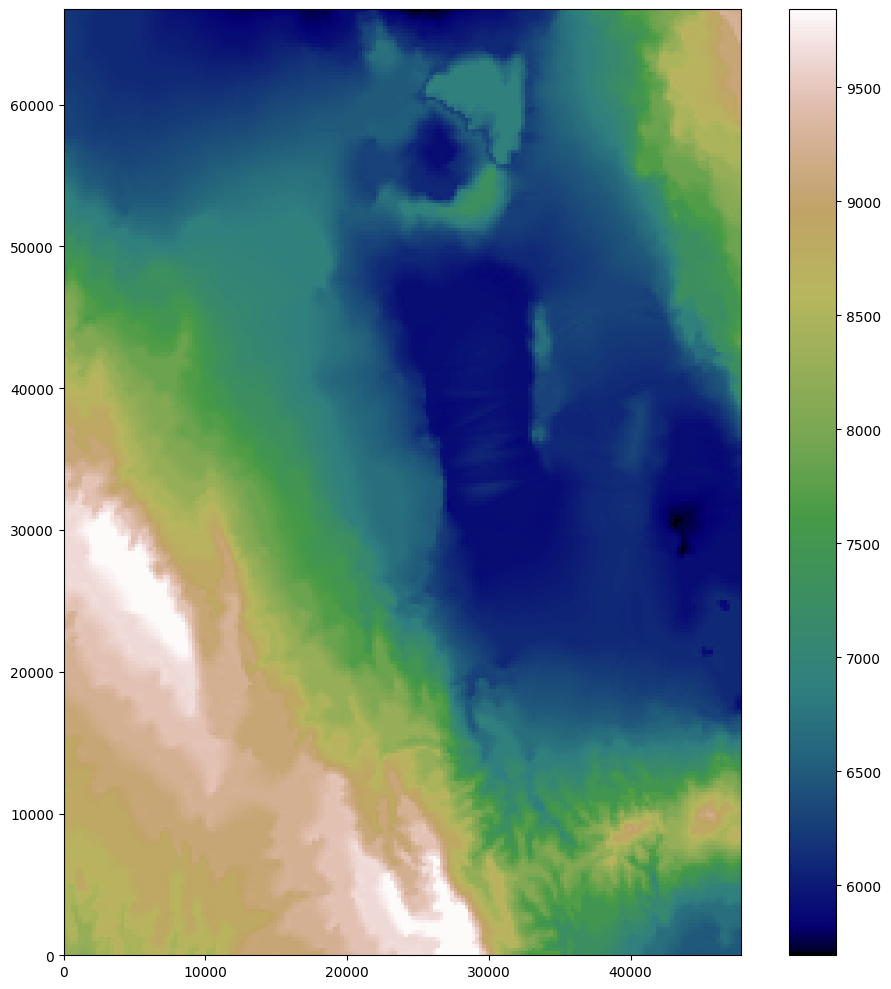

In [ ]:
# plot the raster band 1 (the only band)
from rasterio.plot import show

fig, ax = plt.subplots(figsize=(10,10))
# this is a trick to get the colorbar out of the rasterio plot (which has georeference, plt.imshow only shows the numpy array positions)
image_hidden = ax.imshow(elev_arr, cmap="gist_earth")
fig.colorbar(image_hidden, ax=ax)

show(nrelief_src, 1, cmap="gist_earth", ax=ax)

plt.tight_layout()

### Apply regression model to elevation raster

- map algebra
- create new temperature raster

In [ ]:
# Temperature raster = a[nrelief.tiff] +b
temp_arr = ...

In [ ]:
# plot temperature raster, try cmap "coolwarm"

### Reclassify

- map algebra
- create new categorical temperature zones raster

In [ ]:
# for the lazy ones not wanting to type in the table

Temperature_zones = """Temperature Zone	Temperature Range (C)
9	<10
8	10-12
7	12-14
6	14-16
5	16-18
4	18-20
3	20-22
2	22-24
1	24-30"""

tez = pd.read_table(io.StringIO(Temperature_zones))
tez

In [ ]:
tez.info()

### Classification through numpy digitize, using bins with class bounds

In order to make easy use of numpy's classification function we need to provide class bounds for the bins (aka classes). Numpy Masked Array (ma) is only needed to keep track of nodata values, in case there are any

- [np.digitize](https://numpy.org/doc/stable/reference/generated/numpy.digitize.html)
- [np.ma.getmask](https://numpy.org/doc/stable/reference/generated/numpy.ma.getmask.html)
- [np.ma.masked_where](https://numpy.org/doc/stable/reference/generated/numpy.ma.masked_where.html)


In [ ]:
# take the (upper) class bounds  from the TEZ table
tez['class_bounds'] = pd.to_numeric(tez[ 'which column' ].apply(lambda x: x[-2:]))

# Create classes from given table
tez_bins = tez['class_bounds'].to_list()

# add lower class bounds (negative infinite)
tez_bins = [-np.inf] + tez_bins

# attention, we need to keep track of the ID/numbers for the Temperature zone
# short cut here is to reverse the list

# hint 'reverse'

display(tez_bins)

# apply  np.digitize classes to Temperature array
tez_classified = np.digitize( 'temperature raster array' , 'bins list')

# Apply a nodata mask to the newly classified data (for the nan inf number fields in case)
tez_classified = np.ma.masked_where(np.ma.getmask(temp_arr), tez_classified)

# and check the number of unique values in our now classified dataset
display(np.unique(tez_classified))

### make a legend for the Zones

In [ ]:
values = np.unique(tez_classified)

fig, ax = plt.subplots(figsize=(10,10))
img = ax.imshow(tez_classified, cmap="coolwarm_r", interpolation='none')

# get the colors of the values, according to the
# colormap used by imshow
colors = [ img.cmap(img.norm(value)) for value in values]
# create a patch (proxy artist) for every color
patches = [ mpatches.Patch(color=colors[i], label="Zone {l}".format(l=values[i]) ) for i in range(len(values)) ]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )

plt.grid(True)
plt.show()


### write out for later

- copy spatial metadata (incl. origin, resolution, coordinate reference system) from base raster (nrelief.tif), location and extent haven't changed
- write numpy array as georeferenced raster

In [ ]:
out_meta = nrelief_src.meta.copy()

with rasterio.open("tez_classified.tif", "w", **out_meta) as dest:
    dest.write(tez_classified, 1)

## Second path: Prepare moisture availability zones raster

### Evaporation raster

- apply evap model to elevation raster
- map algebra, create new evaporation raster

In [ ]:
# evaporation raster = 2422 - (0.109*[nrelief.tiff])
evap_arr =
evap_arr

In [ ]:
# plot map to see


### moisture availability raster

- map algebra: moisture availability = mean annual rainfall / potential evaporation
- create new moisture availability raster

In [ ]:
# moisture availability = mean annual rainfall / potential evaporation
# make sure evap array and rainfall raster are aligned, check raster metadata

display(nrain_src.meta)
display(nrelief_src.meta)

In [ ]:
# create moisture availability raster
# nrain raster / evap_arr
mois_arr =


In [ ]:
# plot moisture availability raster

### Reclassify

- map algebra
- create new categorical moisture availability zones raster
- very similar steps as before

In [ ]:
# your lazy short cut

Moisture_availability_zones = """Moisture Availability Zone	Moisture Availability Range
7	<0.15
6	0.15-0.25
5	0.25-0.40
4	0.40-0.50
3	0.50-0.65
2	0.65-0.80
1	>0.80"""


In [ ]:
... pd.to_numeric(maz['column'].apply(lambda x: 'take the last 4 characters'))

In [ ]:
# Create class bounds into bins from above table

# make sure you fill at the end or at the beginning an infinite bounds to capture above/below

# consider bin list ordering
maz_bins

In [ ]:
# apply classes to moisture availability array
maz_classified = np.digitize('moisture availability raster' , 'class bounds bin list')

In [ ]:
# Apply a nodata mask to the newly classified data (for the nan inf number fields in case)
maz_classified = np.ma.masked_where(np.ma.getmask(mois_arr), maz_classified)

# and check the number of unique values in our now classified dataset
np.unique(maz_classified)

In [ ]:
mois_arr.min()

In [ ]:
mois_arr.max()

In [ ]:
# plot classified moisture availability raster

In [ ]:
# plot with a nice legend, create legend patches like before



### write out for later

- copy spatial metadata (incl. origin, resolution, coordinate reference system) from base raster (nrelief.tif), location and extent haven't changed
- write numpy array as georeferenced raster

### Combine the two classified rasters to create agro-climatic zones

Now that we have images of temperature zones and moisture availability zones, we can combine these to create agro-climatic zones. Each resulting agro-climatic zone should be the result of a unique combination of temperature zone and moisture zone.

However, for this step we can't use normal map algebra because we are not doing calculation but combining the values.

You need to write a function that will assign new class values to every unique combination. To see what combination is behind every new class value, create a legend that shows which zones were created together with your raster.

Create a map of agro-climatic zones for your report. In the legend, show the original value combinations e.g. 2-5, 1-6 etc.


In [ ]:
display(nrelief_src.read(1).shape)
display(maz_classified.shape)
display(tez_classified.shape)

In [ ]:
assert( maz_classified.shape ==  tez_classified.shape)
orig_shape = maz_classified.shape

# .reshape(orig_shape)
# .flatten()

# joint_arr = np.array([flattened, ...]).T

In [ ]:
cross_unique = np.unique(joint_arr, axis = 0)
cross_unique

In [ ]:
# create a place where you store the IDs for unique zones combinations
# for example a dict, use it for lookup when labeling the final combined raster with the IDs of your unique combinations
category_dict = {}



### For example, agro-clim zone id and unique combination

    Zone 0: (1, 6)
    Zone 1: (1, 7)
    Zone 2: (1, 8)
    Zone 3: (2, 5)
    Zone 4: (2, 6)
    Zone 5: (2, 7)
    Zone 6: (2, 8)
    Zone 7: (3, 5)
    Zone 8: (3, 6)
    Zone 9: (3, 7)
    Zone 10: (4, 5)
    Zone 11: (4, 6)
    Zone 12: (5, 5)

In [ ]:
# would be easy to reshape from a flattened array to original dimensions for the newly labeled raster
new_arr = new_arr.reshape(orig_shape)

In [ ]:
new_arr

In [ ]:
category_combos = list(map(lambda k: str(k), category_dict.keys()))
category_combos

In [ ]:
# plot the new raster, add the combinations to the legend patch label text
...
patches = [ mpatches.Patch(color=colors[i], label="Zone {l} - {combo}".format(l=values[i], combo=category_combos[i]) ) for i in range(len(values)) ]
...

### write out for later

- copy spatial metadata (incl. origin, resolution, coordinate reference system) from base raster (nrelief.tif), location and extent haven't changed
- write numpy array as georeferenced raster

In [ ]:
# write raster out into agro-clim zone raster file

In [ ]:
# reopend raster from geotiff and plot with legend again to be sure


In [ ]:
with rasterio.open("agro-clim zone raster file") as src2:
    ...
    plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )
    ...

### Calculate the areas of agro-climatic zones in hectares

The last step would be to calculate areas for each agro-climatic zone and identify the biggest agro-climatic zone. Calculate the areas of agro-climatic zones in hectares. Find the biggest agro-climatic zone and it’s area in hectares and add this to Moodle as comment when submitting the maps.


In [ ]:
with rasterio.open("agro_classified.tif") as src:
    data = src.read(1)
    source_meta = src.meta

In [ ]:
data.shape

In [ ]:
source_meta

### Pixel size

- Affine(a, b, c, d, e, f)
- parameter order depends on implementation
- the transform or geotransform: https://rasterio.readthedocs.io/en/latest/topics/georeferencing.html#affine


      a=cell_unit_sizeX (in crs units), b=0, c=xulcorner (from crs origin),
      d=0, e= -cell_unit_sizeY (in crs units), f=yulcorner (from crs origin)
      
      pixel_area = a*-e (for rasterio Affine)

In [ ]:
# calculate per pixel area

In [ ]:
area_info = []

# count all pixels for each category (unique agro-climate zone), multiply by pixel size, consider units

In [ ]:
import pandas as pd

# dataframe for easy summary table
summary = pd.DataFrame(area_info, columns=["zone", "counts", "area_ha"])

# what is the larges zone

In [ ]:
# write to csv just to be sure
summary.to_csv("agro_zones.csv", index=True)